In [1]:
import os
import glob
import re
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
apps = [i for i in os.listdir('./smali') if i[0] != '.']

In [11]:
# get all filenames with .smali using glob recursive=True
app = 'google_cal'
smali = glob.glob('./smali/%s/smali/**/*.smali'%app, recursive=True)

In [12]:
len(smali)

15656

In [13]:
smali[0]

'./smali/google_cal/smali/androidx/transition/ViewUtilsApi29.smali'

In [14]:
def find_api_calls(iterable, var):
    '''
    Find api calls in a list of texts and save the api calls into var
    input: iterable (list of texts), var (list to save to)
    '''
    for i in iterable:
        if('invoke-' in i and 'method' not in i):
            api_call = re.search('L.+', i).group(0)[1:]
            var.append(api_call)

In [15]:
calls = list()
for path in smali:
    with open(path) as f:
        # find api calls
        find_api_calls(f, calls)

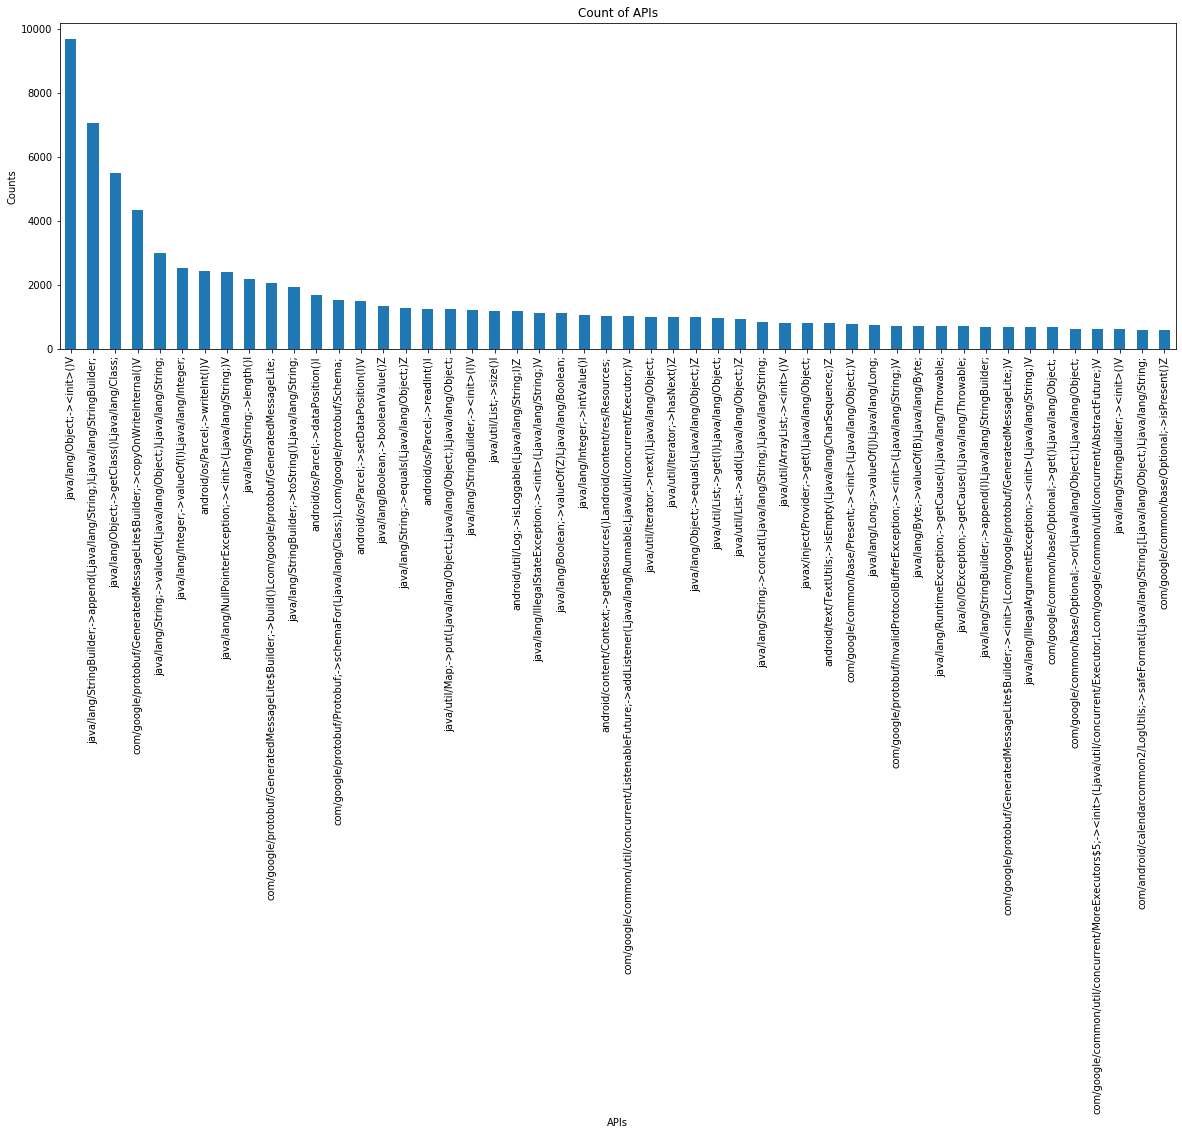

In [16]:
fig= plt.figure(figsize=(20,6))
pd.Series(calls).value_counts().iloc[:50].plot(kind='bar');

plt.title('Count of APIs');
plt.xlabel('APIs');
plt.ylabel('Counts');
plt.savefig('./candy_crush.png')

In [17]:
pd.Series(calls).value_counts().iloc[:50]

java/lang/Object;-><init>()V                                                                                                                      9696
java/lang/StringBuilder;->append(Ljava/lang/String;)Ljava/lang/StringBuilder;                                                                     7075
java/lang/Object;->getClass()Ljava/lang/Class;                                                                                                    5494
com/google/protobuf/GeneratedMessageLite$Builder;->copyOnWriteInternal()V                                                                         4363
java/lang/String;->valueOf(Ljava/lang/Object;)Ljava/lang/String;                                                                                  3017
java/lang/Integer;->valueOf(I)Ljava/lang/Integer;                                                                                                 2532
android/os/Parcel;->writeInt(I)V                                                              

In [18]:
calls = dict()
for path in smali:
    with open(path) as f:
        for line in f:
            # find api calls
            if('invoke' in line):
                api = re.search('\/{1}\w+;', line)
                if(api):
                    api = api.group(0)[1:-1]
                    try:
                        calls[api] += 1
                    except:
                        calls[api] = 1

In [19]:
{k: v for k, v in sorted(calls.items(), key=lambda item: item[1], reverse=True)}

{'Object': 19378,
 'StringBuilder': 12668,
 'String': 12498,
 'Parcel': 9894,
 'List': 4760,
 'View': 4729,
 'Integer': 4064,
 'GeneratedMessageLite': 3916,
 'Context': 3773,
 'ArrayList': 3162,
 'Optional': 2750,
 'Map': 2598,
 'Boolean': 2544,
 'Log': 2450,
 'NullPointerException': 2401,
 'ImmutableList': 2196,
 'Iterator': 2148,
 'Resources': 1976,
 'Bundle': 1972,
 'Schema': 1891,
 'ListenableFuture': 1871,
 'Calendar': 1676,
 'Math': 1672,
 'IllegalStateException': 1648,
 'Protobuf': 1534,
 'IllegalArgumentException': 1519,
 'Long': 1444,
 'ObservableSupplier': 1400,
 'Intent': 1318,
 'RecyclerView': 1316,
 'Consumer': 1307,
 'Iterable': 1289,
 'Class': 1268,
 'TypedArray': 1176,
 'IOException': 1143,
 'Drawable': 1127,
 'Cursor': 1111,
 'Byte': 1076,
 'TextView': 1002,
 'RuntimeException': 983,
 'TextUtils': 944,
 'Arrays': 897,
 'Event': 870,
 'ContentValues': 845,
 'Provider': 831,
 'Paint': 812,
 'Rect': 810,
 'Runnable': 798,
 'LogUtils': 787,
 'Present': 776,
 'Executor': 76

In [20]:
G = nx.Graph()

In [21]:
G.add_node(1)
G.add_nodes_from([2, 3])

In [22]:
G.add_edge(1, 2)
G.add_edge(1, 3)

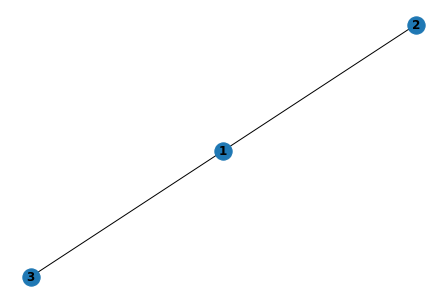

In [23]:
nx.draw(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

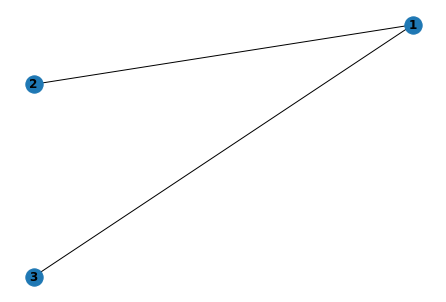

In [24]:
G.add_node(1)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

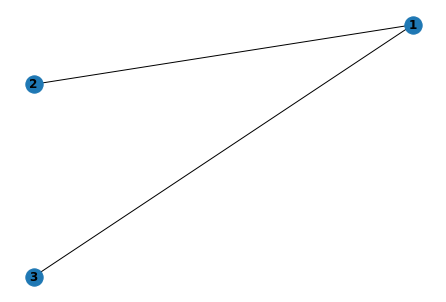

In [25]:
G.add_edge(1, 2)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [26]:
G.degree

DegreeView({1: 2, 2: 1, 3: 1})

In [27]:
G.add_edge(1, 2)
G.degree

DegreeView({1: 2, 2: 1, 3: 1})

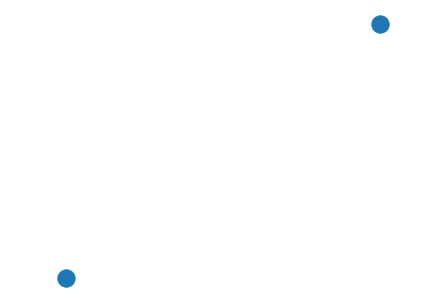

In [28]:
relation = nx.Graph()
# relation.add_node('a')
relation.add_nodes_from(['a','b'])
pos=nx.spring_layout(relation)
nx.draw(relation, pos)
# nx.draw_shell(relation, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [29]:
# with open(smali[0]) as f:
#     doc = f.read()  
#     the_class = re.search('\.class.+;{1}', doc).group(0)[8:-1]
#     the_super = re.search('\.super.+;{1}', doc).group(0)[8:-1]
#     relation.add_node(node)

# the_class
# the_super

In [30]:
# path are the smali files
for path in smali:
    with open(path) as f:
        # read the entire doc
        doc = f.read()
        # obtain the class and super part
        the_class = re.search('\.class.+;{1}', doc).group(0)[8:-1]
        the_super = re.search('\.super.+;{1}', doc).group(0)[8:-1]
        # both class and super are a "class", add to node
        relation.add_node(the_class)
        relation.add_node(the_super)
        # class inherits super so add an edge
        relation.add_edge(the_class, the_super)

In [31]:
relation.nodes

NodeView(('a', 'b', 'inal Landroidx/transition/ViewUtilsApi29', 'androidx/transition/ViewUtilsApi23', 'ublic final Landroidx/transition/AutoTransition', 'androidx/transition/TransitionSet', 'ublic Landroidx/transition/PathMotion', 'java/lang/Object', 'inal Landroidx/transition/FragmentTransitionSupport$5', 'inal Landroidx/transition/TransitionManager$MultiListener', 'inal Landroidx/transition/FragmentTransitionSupport$1', 'androidx/transition/Transition$EpicenterCallback', 'inal Landroidx/transition/ViewGroupOverlayApi18', 'inal Landroidx/transition/TransitionUtils', 'ublic final Landroidx/transition/TransitionValues', 'inal Landroidx/transition/TransitionManager$MultiListener$1', 'androidx/transition/TransitionListenerAdapter', 'inal Landroidx/transition/ViewUtils$2', 'android/util/Property', 'inal Landroidx/transition/ChangeBounds$ViewBounds', 'inal Landroidx/transition/FragmentTransitionSupport$3', 'ublic final Landroidx/transition/Scene', 'inal Landroidx/transition/TransitionValues

KeyboardInterrupt: 

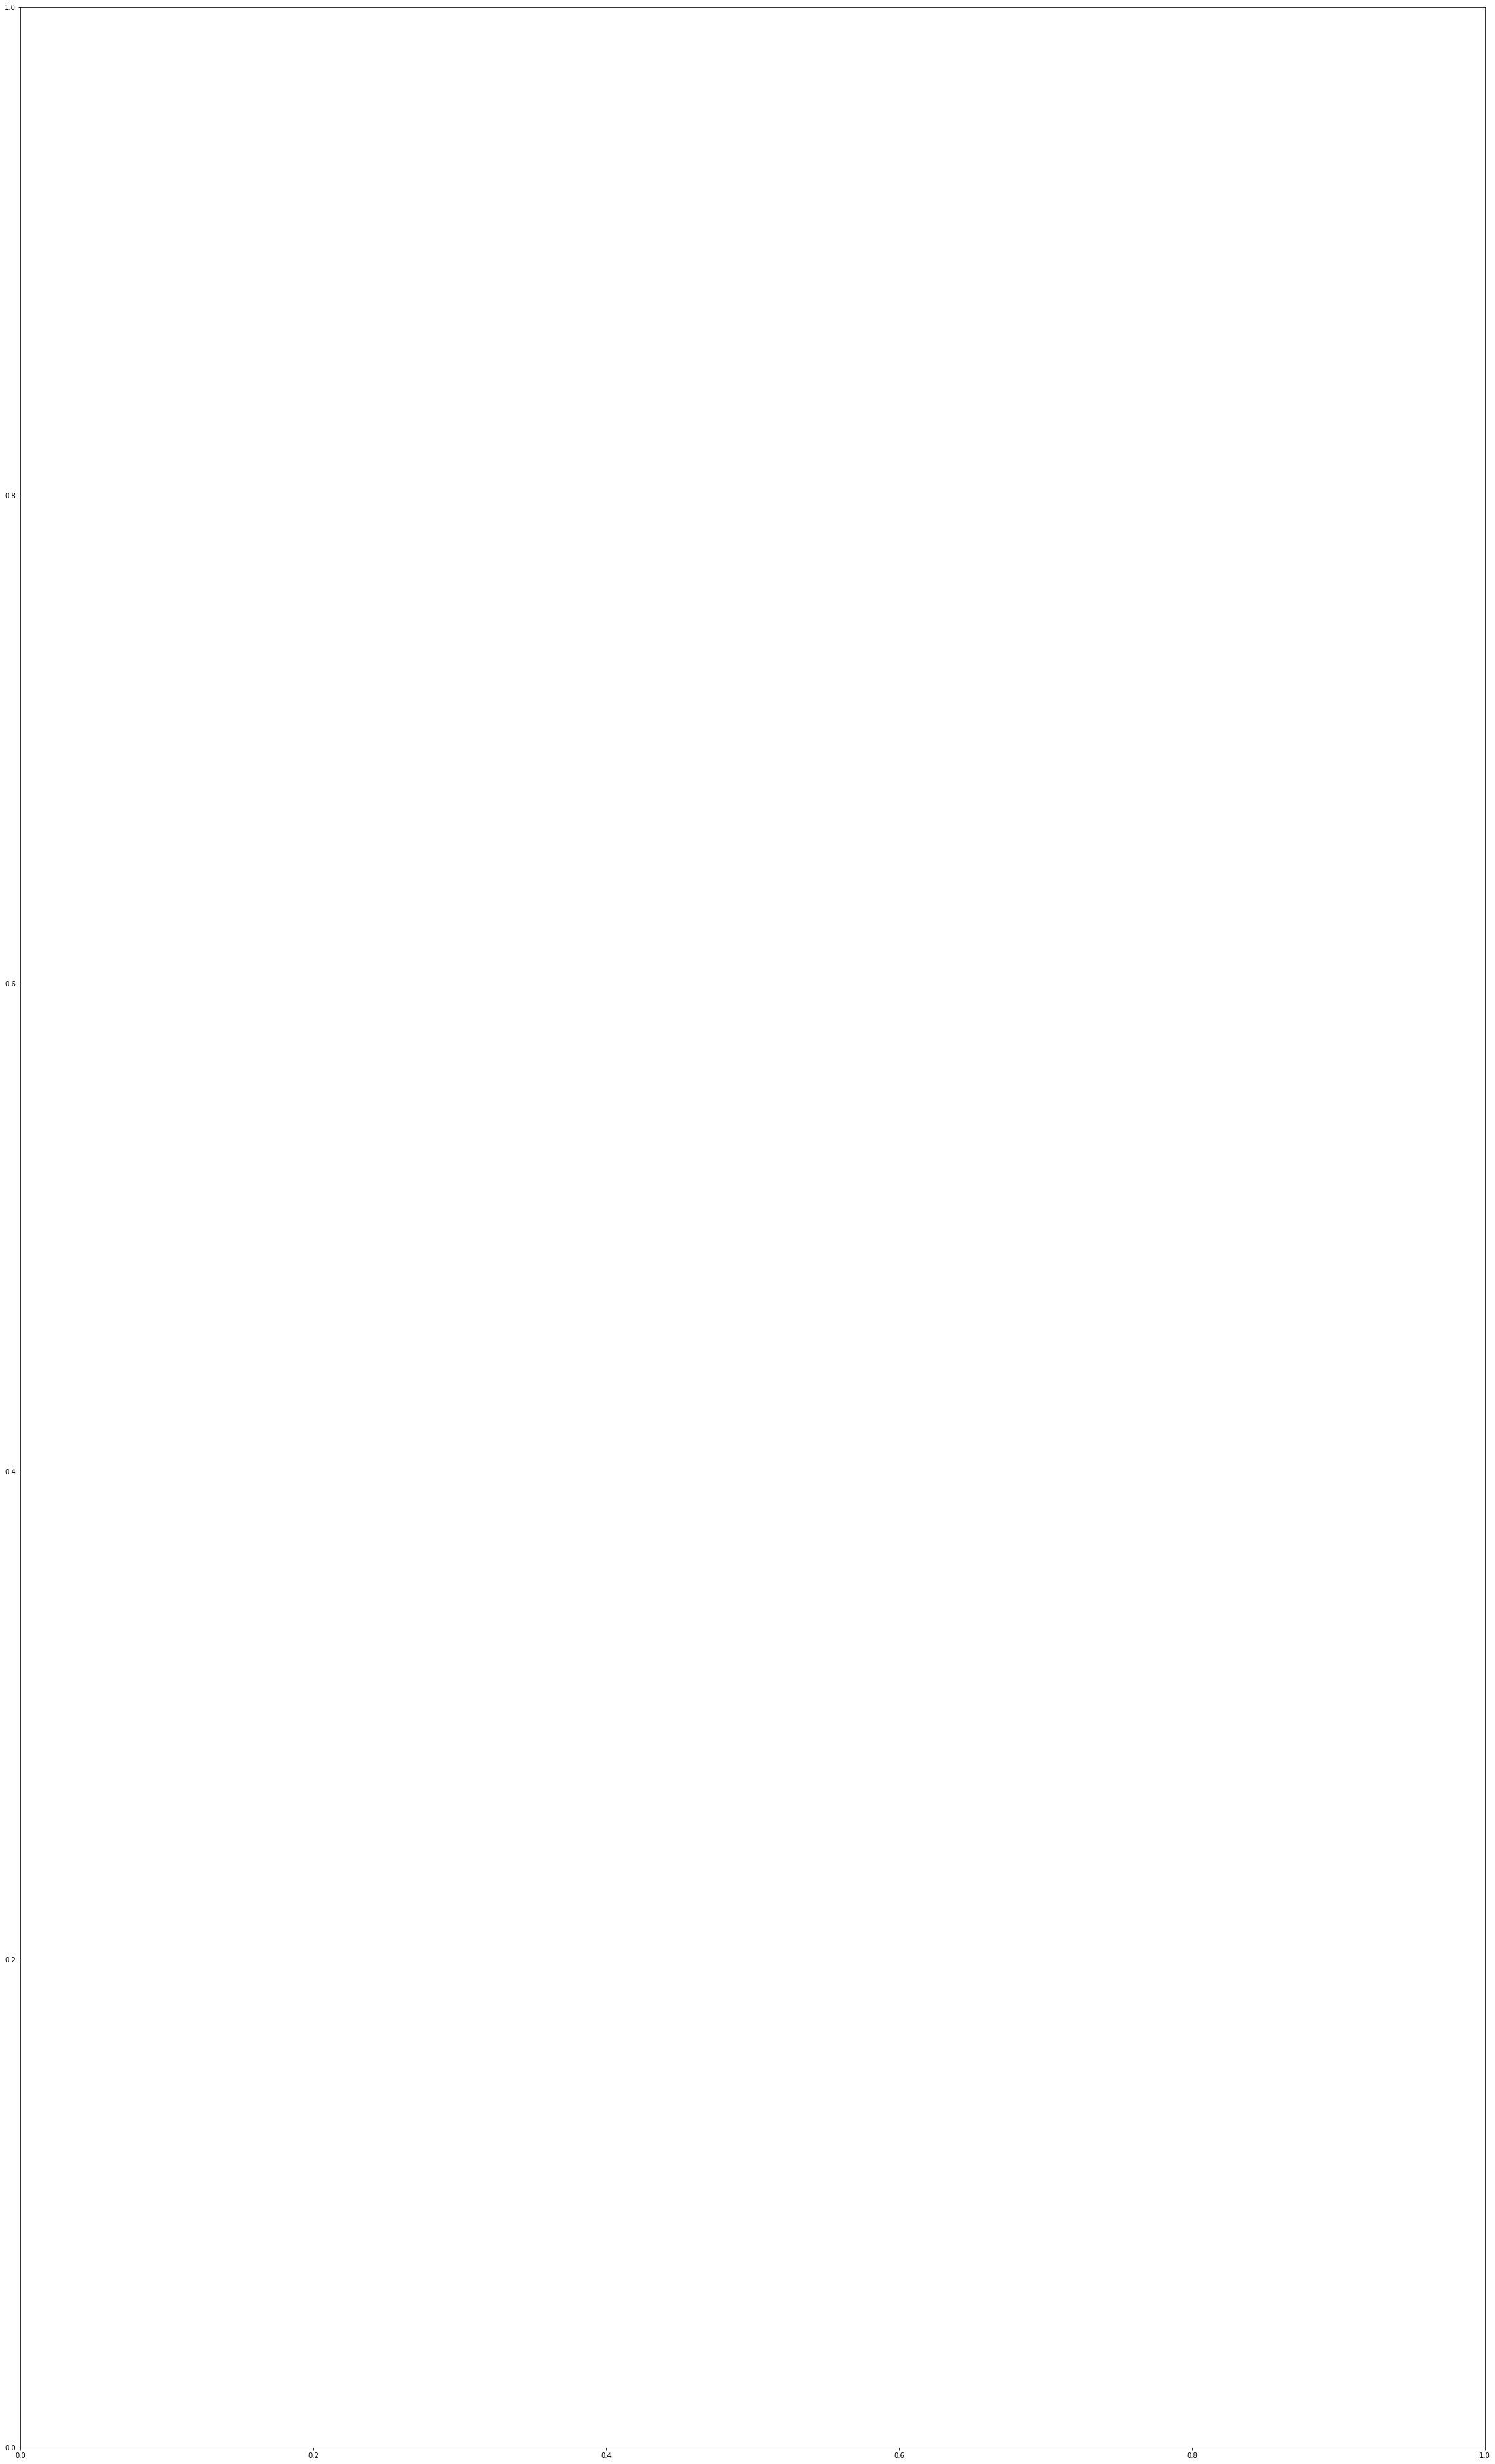

In [32]:
plt.figure(figsize=(30,50)) 
nx.draw(relation, node_size=60)
plt.savefig('candy_crush_relations.png')

In [33]:
pd.DataFrame(relation.degree).sort_values(by=1, ascending=False)

,0,1
7,java/lang/Object,11455
1203,com/google/protobuf/GeneratedMessageLite,352
1205,com/google/protobuf/GeneratedMessageLite$Builder,352
74,java/lang/Enum,138
9471,com/google/android/gms/common/internal/safepar...,136
...,...,...
5845,inal synthetic Lcom/google/android/calendar/ap...,1
5846,inal synthetic Lcom/google/android/calendar/ap...,1
5847,inal synthetic Lcom/google/android/calendar/ap...,1
1,b,0


In [34]:
relation.remove_node('java/lang/Object')

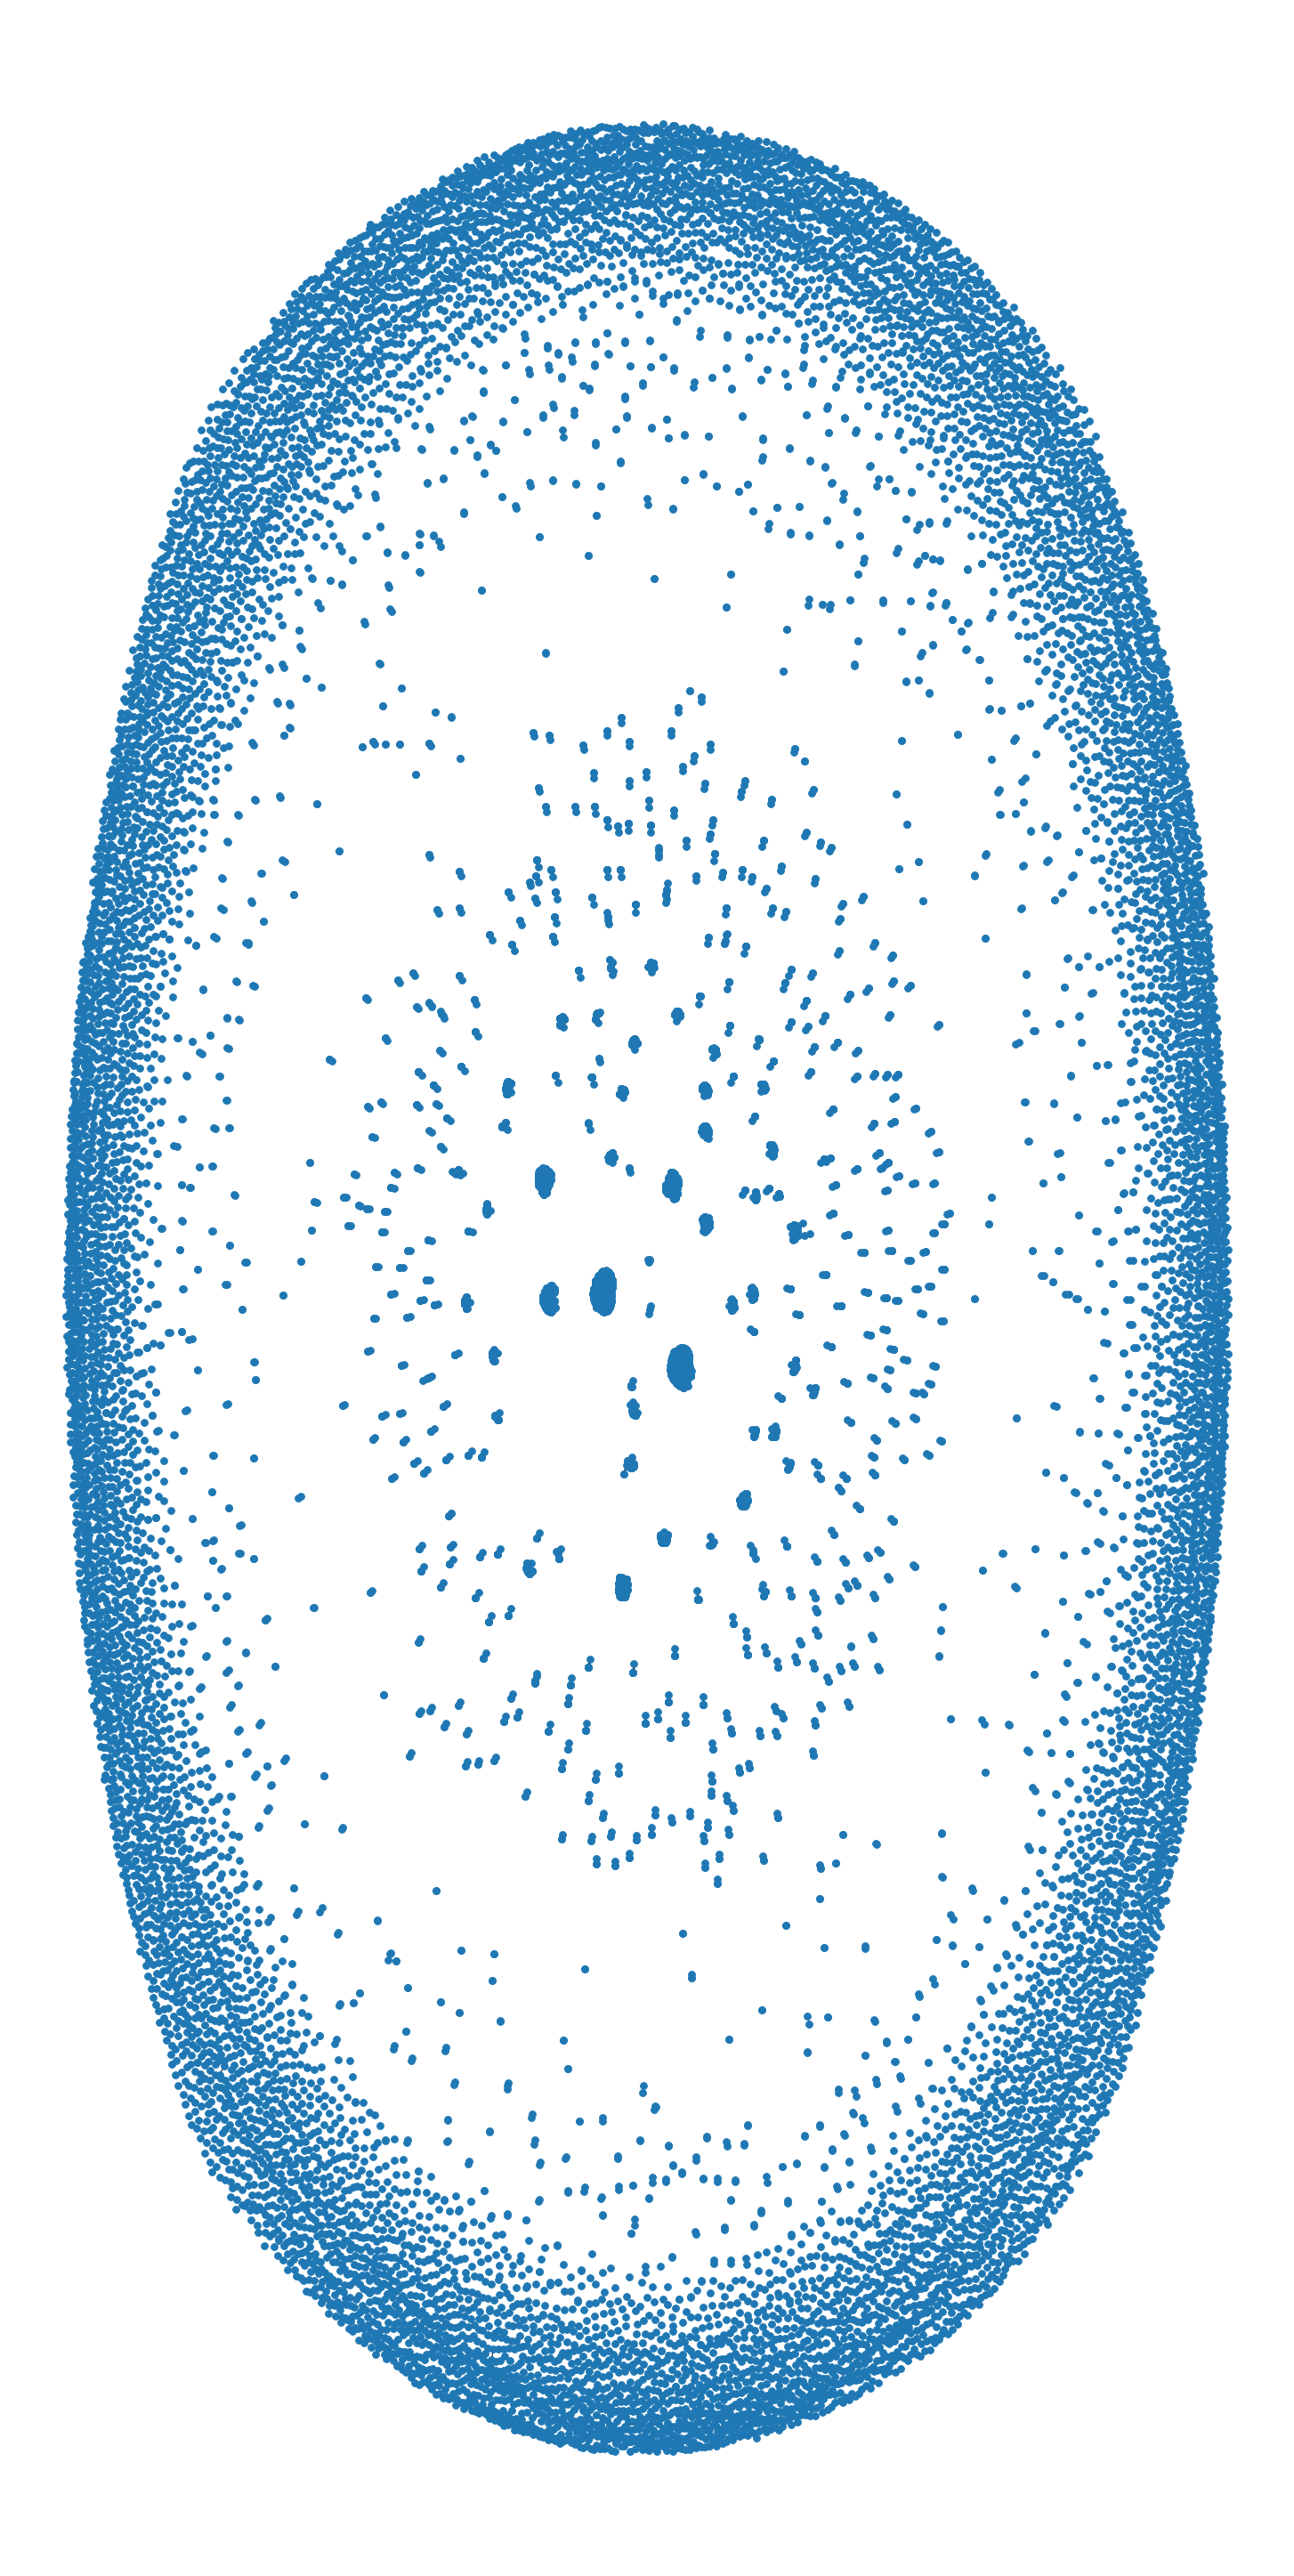

In [35]:
plt.figure(figsize=(20,40)) 
nx.draw(relation, node_size=60)
plt.savefig('candy_crush_relations.png')